# Description

- The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

- The dataset consists of 45211 records and has 19 different attributes.
- The dataset includes records from May 2008 to November 2010.
- The goal is to predict if the client will subscribe (yes/no) a term deposit (variable -  response).


# Packages To Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import recall_score,precision_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Import the Data
- Reading and just checking the general information about the data

In [2]:
df = pd.read_csv('bank-marketing.csv')
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.shape

(45211, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [5]:
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

Since we have no missing values, this saves us lots of time and stress of getting rid of them.

In [6]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Exploratory Data Analysis 

- There is something fishy with the pday column which needs to be rectified.

In [7]:
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [8]:
print('Median of pdays:',df.pdays.median())
print('Mean of pdays:',df.pdays.mean())

Median of pdays: -1.0
Mean of pdays: 40.19782796222158


- The mean is 40.19 while the median is -1.
- From the description all the 25th,50th,75th percentiles are -1.
- But the -1 refers to the client who was never contacted previously so we will replace -1 with 0 to rectify the mean, median, 25th,50th,75th percentile values.

In [9]:
# Replacing -1 with 0
df['pdays'] = df['pdays'].replace([-1],0)

In [10]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,0,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,0,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,0,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,0,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,0,0,unknown,no


In [11]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,41.015195,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,99.792615,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,0.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,0.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,0.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [12]:
# Creating variables for categorical and numerical columns

In [13]:
cat_cols = [n for n in df.columns if df[n].dtypes == 'object']
cat_cols

['job',
 'marital',
 'education',
 'targeted',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'response']

In [14]:
num_cols = [n for n in df.columns if df[n].dtypes == 'int64']
num_cols

['age',
 'salary',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous']

In [15]:
# Renaming yes and no in different columns to dintinguish them

df['targeted'].replace(['yes','no'],['t_yes','t_no'], inplace = True)
df['default'].replace(['yes','no'],['d_yes','d_no'], inplace = True)
df['housing'].replace(['yes','no'],['h_yes','h_no'], inplace = True)
df['loan'].replace(['yes','no'],['l_yes','l_no'], inplace = True)

In [16]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,t_yes,d_no,2143,h_yes,l_no,unknown,5,may,261,1,0,0,unknown,no
1,44,technician,60000,single,secondary,t_yes,d_no,29,h_yes,l_no,unknown,5,may,151,1,0,0,unknown,no
2,33,entrepreneur,120000,married,secondary,t_yes,d_no,2,h_yes,l_yes,unknown,5,may,76,1,0,0,unknown,no
3,47,blue-collar,20000,married,unknown,t_no,d_no,1506,h_yes,l_no,unknown,5,may,92,1,0,0,unknown,no
4,33,unknown,0,single,unknown,t_no,d_no,1,h_no,l_no,unknown,5,may,198,1,0,0,unknown,no


# Visualization of data

## Analysis On Categorical Variables

In [17]:
cat_cols

['job',
 'marital',
 'education',
 'targeted',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'response']

In [18]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,t_yes,d_no,2143,h_yes,l_no,unknown,5,may,261,1,0,0,unknown,no
1,44,technician,60000,single,secondary,t_yes,d_no,29,h_yes,l_no,unknown,5,may,151,1,0,0,unknown,no
2,33,entrepreneur,120000,married,secondary,t_yes,d_no,2,h_yes,l_yes,unknown,5,may,76,1,0,0,unknown,no
3,47,blue-collar,20000,married,unknown,t_no,d_no,1506,h_yes,l_no,unknown,5,may,92,1,0,0,unknown,no
4,33,unknown,0,single,unknown,t_no,d_no,1,h_no,l_no,unknown,5,may,198,1,0,0,unknown,no


In [19]:
x, y, hue = "job", "proportion", "response"
hue_order = ["No", "Yes"]

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True))

response  job          
no        blue-collar      0.226041
          management       0.204323
          technician       0.169255
          admin.           0.113722
          services         0.094810
          retired          0.043785
          self-employed    0.034868
          entrepreneur     0.034167
          housemaid        0.028330
          unemployed       0.027579
          student          0.016758
          unknown          0.006362
yes       management       0.245982
          technician       0.158820
          blue-collar      0.133863
          admin.           0.119304
          retired          0.097561
          services         0.069767
          student          0.050860
          unemployed       0.038192
          self-employed    0.035356
          entrepreneur     0.023256
          housemaid        0.020609
          unknown          0.006428
Name: job, dtype: float64

In [20]:
# Plotting using the percentage 
#for i in cat_cols:
 #   x, y, hue = i, "proportion", "response"
  #  hue_order = ["No", "Yes"]
   # 
    #plt.figure(figsize = (15,6))
#    (df[x].groupby(df[hue]).value_counts(normalize=True).rename(y).reset_index()
#     .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
#    plt.show()

In [21]:
df['job'].value_counts(normalize = True)

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64

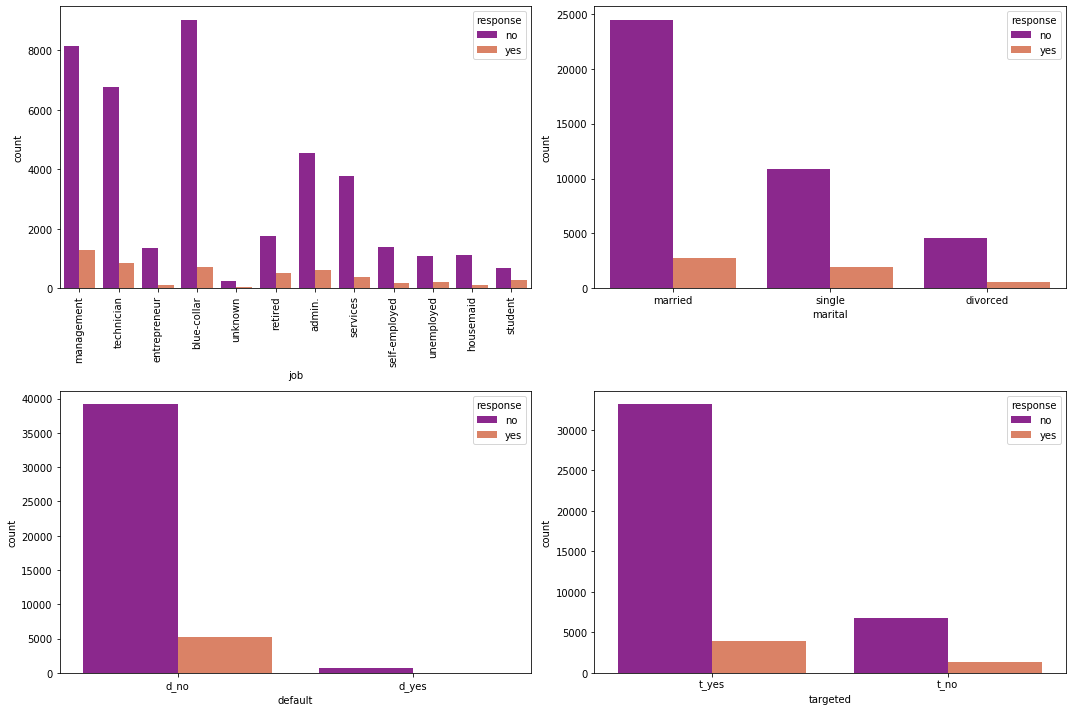

In [22]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.xticks(rotation = 90)
sns.countplot(df.job, palette=("plasma"),hue = df.response)

plt.subplot(2,2,2)
sns.countplot(df.marital, palette=("plasma"), hue = df.response)

plt.subplot(2,2,3)
sns.countplot(df.default, palette=("plasma"), hue = df.response)

plt.subplot(2,2,4)
sns.countplot(df.targeted, palette=("plasma"), hue = df.response)

plt.tight_layout()

plt.show()

From the above plots we can analyze that:
- The majority of customers are having managenent, technician,and blue collar jobs and so these customers have responded positively to the campaign.
- Most of the customers are married followed by singles and some are divrced.
- Only few customers have credict in defult.
- And many of the customers were targetted before and they have responded positively for this campaign.

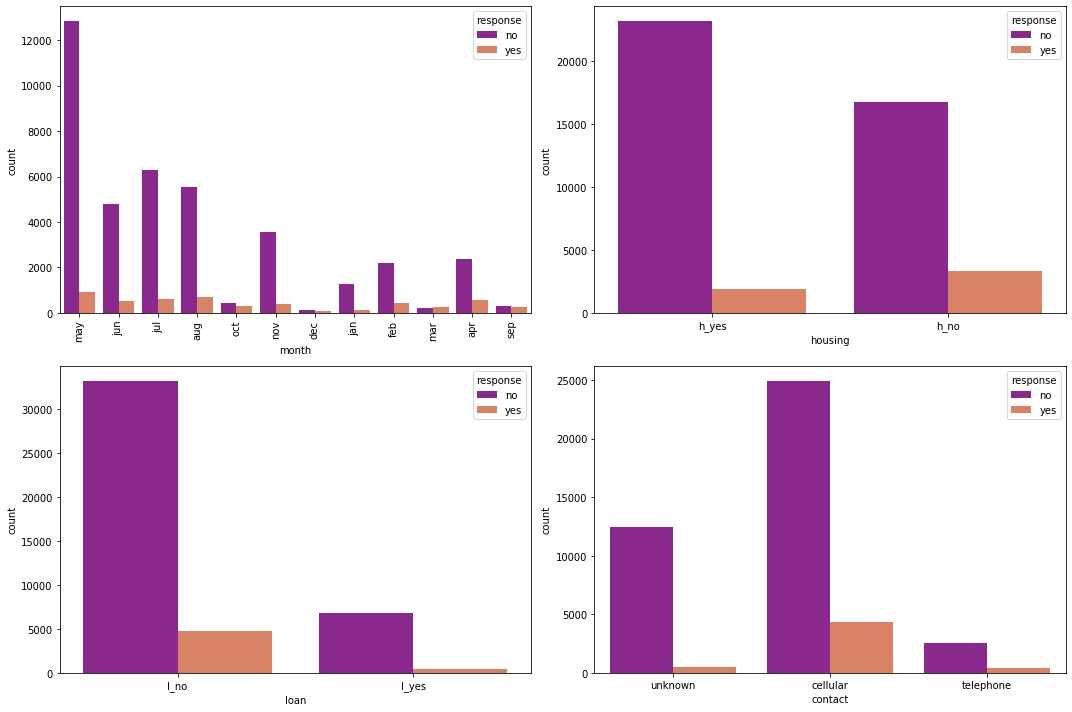

In [23]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.xticks(rotation = 90)
sns.countplot(df.month, palette=("plasma"),hue = df.response)

plt.subplot(2,2,2)
sns.countplot(df.housing, palette=("plasma"),hue = df.response)

plt.subplot(2,2,3)
sns.countplot(df.loan, palette=("plasma"), hue = df.response)

plt.subplot(2,2,4)
sns.countplot(df.contact, palette=("plasma"), hue = df.response)

plt.tight_layout()

plt.show()

From the above plots we get the following information:
- Majority of the customers were last contacted in the months of May followed by June,July,August and remaining customers in following months.While the conversion rate has been good in the month of April
- We can see that many of the customers are having housing loans and the ones who dont't have are responding positively for this campaign.
- The customers not having personal loan are responding positively to the campaign.
- Most of the customers were contacted on mobiles followed by telephones and unknown resources. People contacted on their mobiles (cellular contact) have responded as yes.

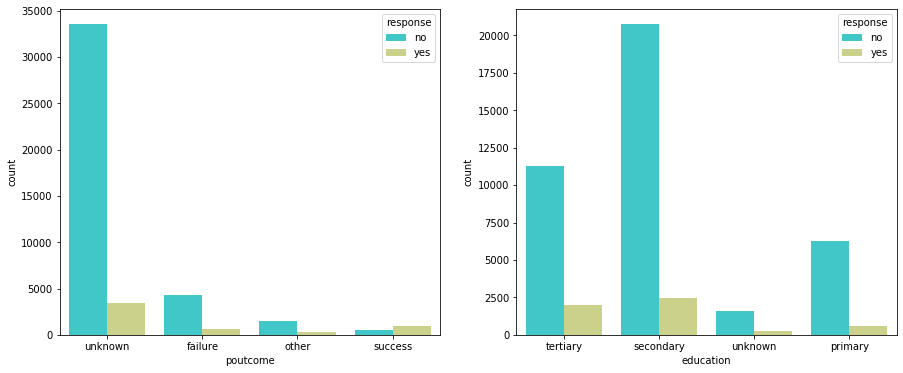

In [24]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.countplot(df.poutcome,palette = 'rainbow',hue = df.response)

plt.subplot(1,2,2)
sns.countplot(df.education,palette = 'rainbow',hue = df.response)
plt.show()

So from above plot we can say that the success rate of this campaign is better campared to the previous campaign.
- Because poutcome plot shows the customers who didn't convert the last time are responding positively this time.
- Also the customers who already resonded positively the last time are willing to opt in for this campaign as well.

People having secondary and tertiary education are the customeres who will frequently respond positively to the campaign than the other education type.

## Analysis of Numerical Variables

In [25]:
num_cols

['age',
 'salary',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous']

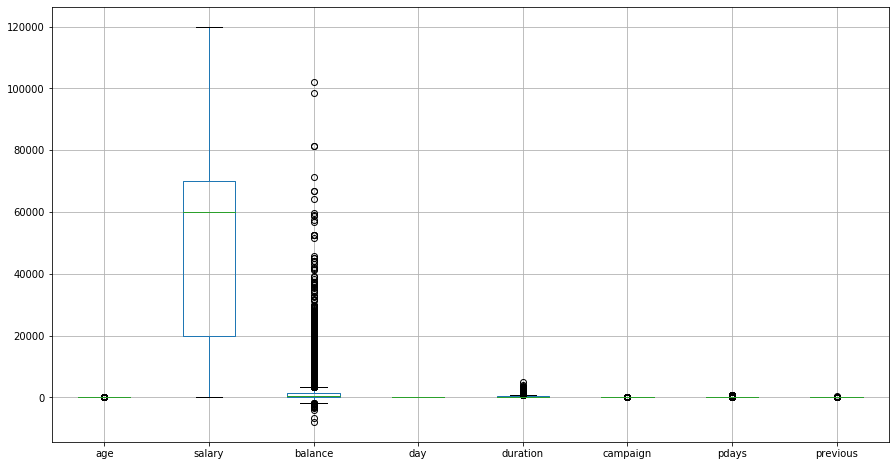

In [26]:
plt.figure(figsize=(15,8))
df.boxplot()

We can see that balance, duration ,pdays,previous columns have to many outliers

In [27]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,t_yes,d_no,2143,h_yes,l_no,unknown,5,may,261,1,0,0,unknown,no
1,44,technician,60000,single,secondary,t_yes,d_no,29,h_yes,l_no,unknown,5,may,151,1,0,0,unknown,no
2,33,entrepreneur,120000,married,secondary,t_yes,d_no,2,h_yes,l_yes,unknown,5,may,76,1,0,0,unknown,no
3,47,blue-collar,20000,married,unknown,t_no,d_no,1506,h_yes,l_no,unknown,5,may,92,1,0,0,unknown,no
4,33,unknown,0,single,unknown,t_no,d_no,1,h_no,l_no,unknown,5,may,198,1,0,0,unknown,no


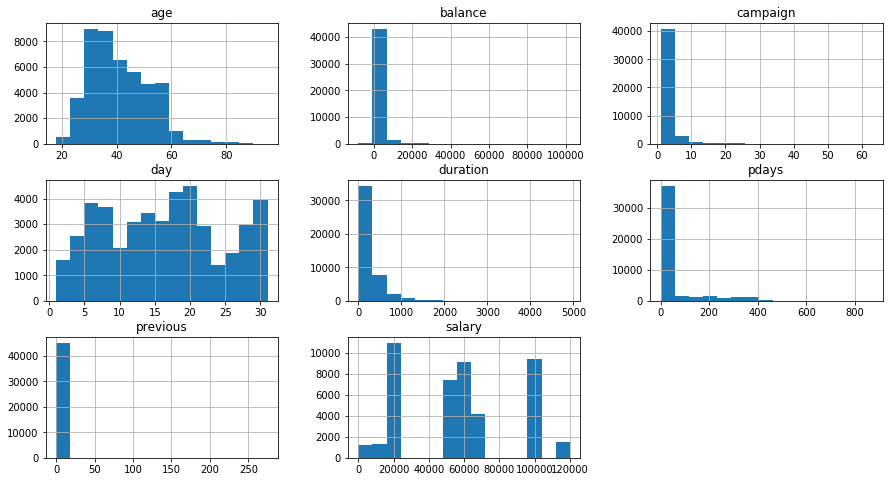

In [28]:
df.hist(bins = 15, figsize = (15,8),layout = (3,3))
plt.show()

From above plots we get lots of information,
- The age columns seems to be right skeweed and has majority of customers with age between 30 to 50, there are less customers above 60 years of age.
- It seems like most of the people have been contacted at least once during this campaign.
-  The number of days passed since last contacted the customer seems to be distributed between 1 -30.

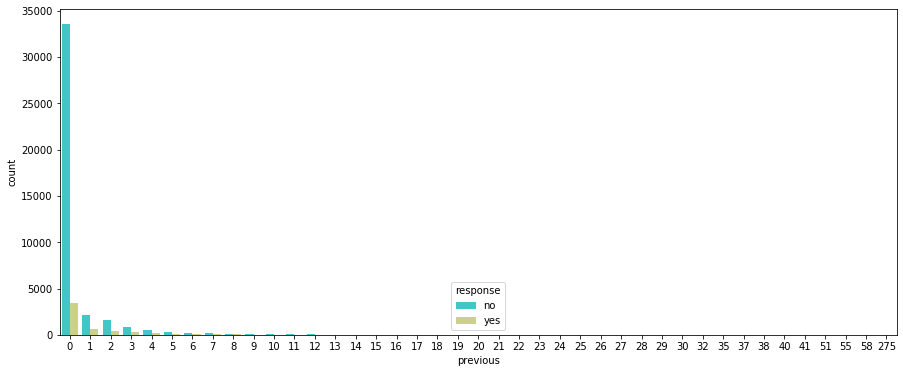

In [29]:
plt.figure(figsize = (15,6))
sns.countplot(df.previous, palette = 'rainbow',hue = df.response)
plt.show()

From above plot we can see that majority of the customers were not contacted preiously are responding positively.

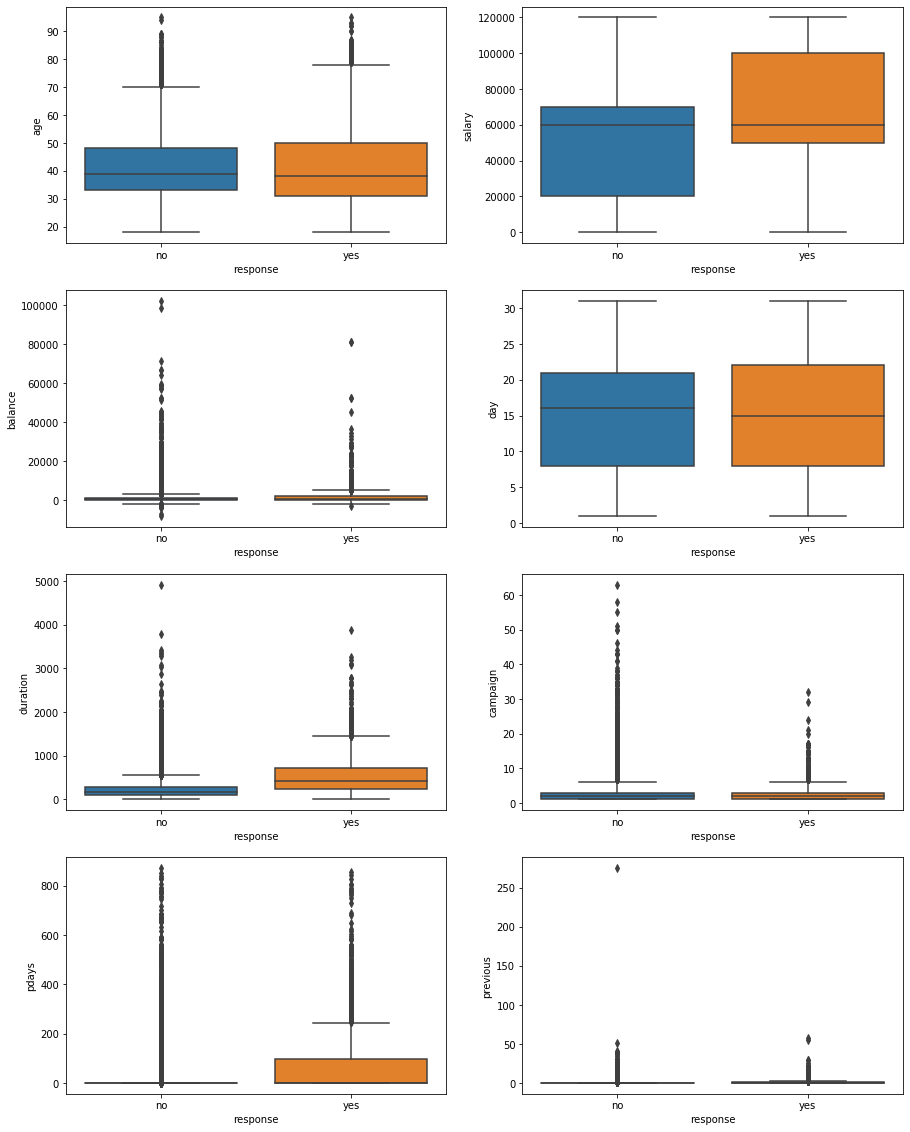

In [30]:
fig,ax = plt.subplots(4,2,figsize = (15,20))
for var,subplot in zip(num_cols, ax.flatten()):
    sns.boxplot(x  = 'response', y = var,data = df, ax = subplot)

From the above plots we can understand quite a few things:
- First the age doesn't seem to affect the response.
- The people having higher salary tend to respond positevily for the campaign.
- The balance, day, campaign columns don't seem to be affecting the response.
- While the duration of time you talk with the customers really helps as you can see that the longer you talk to the customers, more will be the positive response to the campaign.

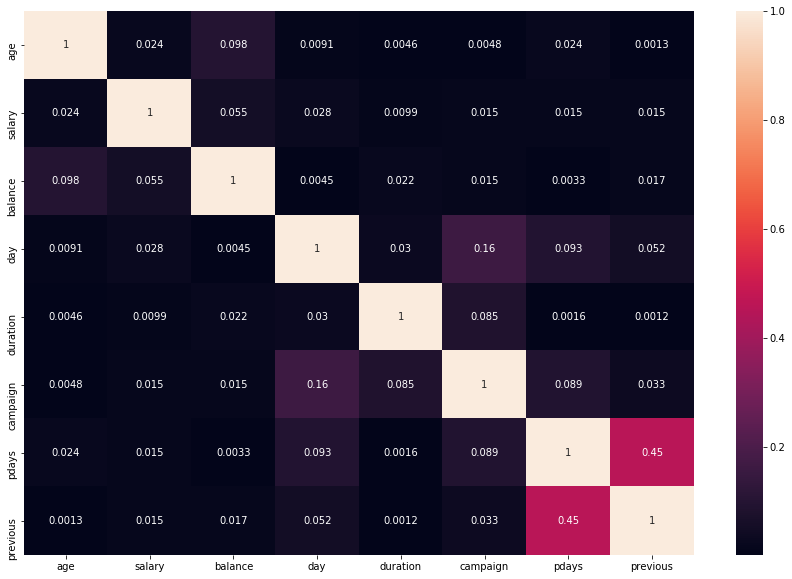

In [31]:
# Checking the relationship between the variables
plt.figure(figsize = (15,10))
sns.heatmap(abs(df.corr()), annot = True)
plt.show()

- From the above heatmap we can see that there is more negative coorelation between the attributes.

#### Are the features about the previous campaign data useful? 

- Yes I think the features about the previous data are usefull, because they give us the information based on previous campaign data that who are the customers that can become our potential clients.

#### Are pdays and poutcome associated with the target?

- Not sure about pdays but the above poutcome plot shows the customers who didn't convert the last time are responding positively this time, so definitly it is associated with target.

# Building Models

### Converting The Categorical Columns Using One Hot Encoding Method

In [32]:
df2 = df.copy()

In [33]:
df2['response'] = df.response.replace(['yes','no'],[1,0])

In [34]:
df2.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,t_yes,d_no,2143,h_yes,l_no,unknown,5,may,261,1,0,0,unknown,0
1,44,technician,60000,single,secondary,t_yes,d_no,29,h_yes,l_no,unknown,5,may,151,1,0,0,unknown,0
2,33,entrepreneur,120000,married,secondary,t_yes,d_no,2,h_yes,l_yes,unknown,5,may,76,1,0,0,unknown,0
3,47,blue-collar,20000,married,unknown,t_no,d_no,1506,h_yes,l_no,unknown,5,may,92,1,0,0,unknown,0
4,33,unknown,0,single,unknown,t_no,d_no,1,h_no,l_no,unknown,5,may,198,1,0,0,unknown,0


In [35]:
df1 = df2.copy()

In [36]:
cat_cols

['job',
 'marital',
 'education',
 'targeted',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'response']

In [37]:
# Encoding the data with 1 and 0 for Machine Learning Models
def ohe(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

df1 = ohe('job',df1)
df1 = ohe('marital',df1)
df1 = ohe('education',df1)
df1 = ohe('targeted',df1)
df1 = ohe('default',df1)
df1 = ohe('housing',df1)
df1 = ohe('loan',df1)
df1 = ohe('contact',df1)
df1 = ohe('month',df1)
df1 = ohe('poutcome',df1)

In [38]:
df1.head()

,age,salary,balance,day,duration,campaign,pdays,previous,response,blue-collar,...,jul,jun,mar,may,nov,oct,sep,other,success,unknown
0,58,100000,2143,5,261,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,60000,29,5,151,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,120000,2,5,76,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,47,20000,1506,5,92,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,33,0,1,5,198,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [39]:
df1.shape

(45211, 45)

### Converting The Data Into Train & Test  And Data Scaling

In [40]:
# X for train and Y for Test
x = df1.drop('response', axis = 1)
y = df1.response

In [41]:
print(x.shape)
print(y.shape)

(45211, 44)
(45211,)


In [42]:
# Splitting the data

In [43]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 100)

In [44]:
# We will scale the data using sklearns standard scalar to bring the data on the same scale

In [45]:
scaler =  StandardScaler()

In [46]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# MODEL 1
## Logistic Regression
- Make a predictive model using logistic regression

In [47]:
lrm = LogisticRegression()

In [48]:
lrm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
predict = lrm.predict(X_test)

**Evaluating The Model**

In [50]:
# Checking Accuracy of the model
accuracy_score(y_test,predict)

0.8995871424358596

In [51]:
# Checking the precision, recall and the f1 score of the model.
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11985
           1       0.63      0.34      0.44      1579

    accuracy                           0.90     13564
   macro avg       0.77      0.66      0.69     13564
weighted avg       0.88      0.90      0.89     13564



In [52]:
confusion_matrix(y_test,predict)

array([[11671,   314],
       [ 1048,   531]], dtype=int64)

In [53]:
# Hyperparameter Tuning for Logistic Regression Model

In [54]:
#param_grid1 = [    
#    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#   'C' : np.logspace(-4, 4, 20), # Regularization
#   'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
#   'max_iter' : [100, 1000,2500, 5000]
#    }
#]

In [55]:
#clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [56]:
#best_clf = clf.fit(X,y)

In [57]:
#best_clf.best_estimator_

In [58]:
#print (f'Accuracy - : {best_clf.score(X,y):.3f}')

## Feature Selection
- Use RFE to select top n features in an automated fashion (choose n as you see fit)

In [59]:
from sklearn.feature_selection import RFE

In [60]:
x = df1.drop('response', axis = 1)
y = df1.response

In [61]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 100)

In [62]:
rfe = RFE(estimator = lrm, step = 2)
rfe = rfe.fit(X_train, y_train)

C:\Users\ranje\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ranje\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [63]:
# Finding Best features from RFE
selected_features = pd.DataFrame({'Feature':list(X_train.columns),'Ranking':rfe.ranking_})
selected_features.sort_values(by = 'Ranking')

,Feature,Ranking
15,student,1
29,unknown,1
28,telephone,1
27,l_yes,1
26,h_yes,1
25,d_yes,1
32,feb,1
42,success,1
19,married,1
17,unemployed,1


In [64]:
X_train.columns[rfe.support_]

Index(['housemaid', 'retired', 'student', 'unemployed', 'married', 'd_yes',
       'h_yes', 'l_yes', 'telephone', 'unknown', 'aug', 'dec', 'feb', 'jan',
       'jul', 'mar', 'may', 'nov', 'oct', 'sep', 'other', 'success'],
      dtype='object')

In [65]:
Imp_features = X_train[X_train.columns[rfe.support_]]
Imp_features.head()

,housemaid,retired,student,unemployed,married,d_yes,h_yes,l_yes,telephone,unknown,...,feb,jan,jul,mar,may,nov,oct,sep,other,success
18391,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
13056,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
13415,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
21022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24510,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [66]:
# Using best features from Recurssive Feature Elimination for building model.
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

In [67]:
X_train_rfe

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [68]:
lrm.fit(X_train_rfe,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
predict1 = lrm.predict(X_test_rfe)

In [70]:
accuracy_score(y_test,predict1)

0.8916248894131524

In [71]:
print(classification_report(y_test,predict1))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11985
           1       0.62      0.18      0.28      1579

    accuracy                           0.89     13564
   macro avg       0.76      0.58      0.61     13564
weighted avg       0.87      0.89      0.86     13564



In [72]:
confusion_matrix(y_test,predict1)

array([[11807,   178],
       [ 1292,   287]], dtype=int64)

## K Fold Cross Validation Scores
- Estimate the model performance using k fold cross validation

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
kfcvs = cross_val_score(lrm,X_train_rfe,y_train,cv = 10)
print('Scores',kfcvs)

Scores [0.89510269 0.89889415 0.88815166 0.89352291 0.89131122 0.89320695
 0.892891   0.88780025 0.88780025 0.8960177 ]


In [75]:
scores = pd.Series(kfcvs)
print('Max Score:',scores.max())
print('Mean Score:',scores.mean())

Max Score: 0.8988941548183255
Mean Score: 0.8924698773524424


## Important Features
- Which features are the most important from your model?

In [76]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,t_yes,d_no,2143,h_yes,l_no,unknown,5,may,261,1,0,0,unknown,no
1,44,technician,60000,single,secondary,t_yes,d_no,29,h_yes,l_no,unknown,5,may,151,1,0,0,unknown,no
2,33,entrepreneur,120000,married,secondary,t_yes,d_no,2,h_yes,l_yes,unknown,5,may,76,1,0,0,unknown,no
3,47,blue-collar,20000,married,unknown,t_no,d_no,1506,h_yes,l_no,unknown,5,may,92,1,0,0,unknown,no
4,33,unknown,0,single,unknown,t_no,d_no,1,h_no,l_no,unknown,5,may,198,1,0,0,unknown,no


In [77]:
names = df.columns

In [78]:
print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names),reverse = True))

Features sorted by their rank:
[(12, 'job'), (11, 'salary'), (11, 'default'), (10, 'education'), (10, 'age'), (9, 'marital'), (9, 'day'), (8, 'campaign'), (8, 'balance'), (7, 'housing'), (6, 'targeted'), (6, 'previous'), (5, 'duration'), (4, 'loan'), (2, 'response'), (1, 'poutcome'), (1, 'pdays'), (1, 'month'), (1, 'contact')]


So the best features are:
- Job
- Salary
- Education
- Default
- Age
- Marital
- Targeted
- Contact
- Balance
- Housing

# MODEL 2 
## Random Forest

- Make a predictive model using random forest technique
- Use not more than 50 trees, and control the depth of the trees to prevent overfitting

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rf = RandomForestClassifier()

In [81]:
from sklearn.model_selection import RandomizedSearchCV

In [82]:
# Hyperparameter Tuning
param_grid = {'n_estimators':[20,30,40,50],
              'max_depth':[10,20,30,40,None]}

In [83]:
random_search = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 10, cv = 10)

In [84]:
random_search.fit(X_train, y_train) 

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [85]:
print('Best score for data:', random_search.best_score_)
print('Best Criterion:', random_search.best_estimator_.n_estimators)
print('Best Max Depth:', random_search.best_estimator_.max_depth)

Best score for data: 0.9049517778004125
Best Criterion: 40
Best Max Depth: 40


In [86]:
rf1 = RandomForestClassifier(n_estimators = 40,max_depth = 20)

In [87]:
rf1.fit(X_train,y_train)
rf_predict = rf1.predict(X_test)

In [88]:
accuracy_score(y_test,rf_predict)

0.9027572987319374

In [89]:
print(classification_report(y_test,rf_predict))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11985
           1       0.64      0.38      0.47      1579

    accuracy                           0.90     13564
   macro avg       0.78      0.67      0.71     13564
weighted avg       0.89      0.90      0.89     13564



### Estimate the model performance using k fold cross validation

In [90]:
kfcvs1 = cross_val_score(rf,X_train,y_train,cv = 10)
print('Scores',kfcvs)

Scores [0.89510269 0.89889415 0.88815166 0.89352291 0.89131122 0.89320695
 0.892891   0.88780025 0.88780025 0.8960177 ]


In [91]:
rf_scores = pd.Series(kfcvs1)
print('Max Score:',rf_scores.max())
print('Mean Score:',rf_scores.mean())

Max Score: 0.9102685624012639
Mean Score: 0.9046671280180067


So the maximum performance we can get out of the Random Forest model with K Fold Cross Validation is 0.9090

## Recursive Feature Elimination with Cross Validation
- We can use this for further improving the performance of the model.

In [92]:
#rfecv = RFECV(estimator = rf, step = 1, cv = 5, scoring = 'accuracy')
#rfecv.fit(X_train,y_train)

In [93]:
#print('Optimal number of features: ', rfecv.n_features_)
#print('Best Features: ', X_train.columns[rfecv.support_])


In [94]:
#rfecv_scores = rfecv.grid_scores_
#print('Max Score',rfecv_scores.max())
#print('Min Score',rfecv_scores.min())

In [95]:
#X_train_rfecv = rfecv.transform(X_train)
#X_test_rfecv = rfecv.transform(X_test)

In [96]:
# Creating Model

#rfecv_rf = rf.fit(X_train_rfecv,y_train)
#rfecv_predict = rf.predict(X_test_rfecv)

In [97]:
#print(classification_report(y_test,rfecv_predict))

### Important Feaatures
- Using the feature importance values from the Random Forest module, identify the most important features for the model

In [98]:
rf1.feature_importances_

array([0.08888345, 0.02896437, 0.08220527, 0.07336632, 0.28416246,
       0.03413296, 0.04306662, 0.02419172, 0.00661094, 0.00275039,
       0.00238799, 0.00729891, 0.00451653, 0.00409116, 0.00488988,
       0.0039126 , 0.00849175, 0.00343154, 0.00107579, 0.01026884,
       0.0094856 , 0.01043116, 0.009428  , 0.00412762, 0.00796113,
       0.00141917, 0.02533799, 0.00886737, 0.00681288, 0.01393389,
       0.01051526, 0.00445177, 0.00716057, 0.00544648, 0.00804094,
       0.01095404, 0.01439598, 0.01001362, 0.0077179 , 0.01296837,
       0.00964912, 0.00376555, 0.06896079, 0.00945529])

In [99]:
print(sorted(zip(map(lambda x: round(x,4),rf1.feature_importances_),names),reverse = True))

[(0.2842, 'education'), (0.0889, 'age'), (0.0822, 'salary'), (0.0734, 'marital'), (0.0431, 'default'), (0.0341, 'targeted'), (0.029, 'job'), (0.0242, 'balance'), (0.0085, 'previous'), (0.0073, 'day'), (0.0066, 'housing'), (0.0049, 'campaign'), (0.0045, 'month'), (0.0041, 'duration'), (0.0039, 'pdays'), (0.0034, 'poutcome'), (0.0028, 'loan'), (0.0024, 'contact'), (0.0011, 'response')]


So the most important features as per the feature importance scores are in the order of:
- Education
- Age
- Salary
- Marital
- Default
- Targeted
- Job
- Balance

In [100]:
df1.describe()

,age,salary,balance,day,duration,campaign,pdays,previous,response,blue-collar,...,jul,jun,mar,may,nov,oct,sep,other,success,unknown
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,41.015195,0.580323,0.116985,0.215257,...,0.152507,0.118135,0.010551,0.304483,0.087810,0.016323,0.012807,0.040698,0.033421,0.817478
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,99.792615,2.303441,0.321406,0.411005,...,0.359516,0.322771,0.102174,0.460193,0.283022,0.126718,0.112441,0.197592,0.179735,0.386278
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Select K-Best Method for selecting Top Features

In [101]:
df4 = df1.copy()

In [102]:
mod_balance = []
for i in df4['balance']:
    if i < 0:
        mod_balance.append(0)
    else:
        mod_balance.append(i)
        

In [103]:
df4['balance'] = mod_balance

In [104]:
a = df4.drop('response', axis = 1)
b = df4.response

In [105]:
Selectkbest = SelectKBest(score_func = chi2,k = 10)
SKBfit = Selectkbest.fit(a,b)

In [106]:
dfscores = pd.DataFrame(SKBfit.scores_)
dfcolumns = pd.DataFrame(a.columns)

In [107]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [108]:
featureScores[:10]

,Specs,Score
0,age,7.879958e+01
1,salary,3.269891e+05
2,balance,7.884598e+05
3,day,1.592004e+02
4,duration,1.807711e+06
5,campaign,8.405821e+02
6,pdays,1.171871e+05
7,previous,3.593220e+03
8,blue-collar,1.843481e+02
9,entrepreneur,1.690398e+01


In [109]:
# Selecting top features with highest scores
# Remember higher the score better the feature
Top_N = featureScores.nlargest(20,'Score')
Top_N

,Specs,Score
4,duration,1.807711e+06
2,balance,7.884598e+05
1,salary,3.269891e+05
6,pdays,1.171871e+05
42,success,4.113001e+03
7,previous,3.593220e+03
5,campaign,8.405821e+02
36,mar,7.496919e+02
39,oct,7.347082e+02
29,unknown,7.333549e+02


# Best Features

After comparing all the results from both the models some of the best features we found in order to identify the customers response are:

- Education
- Age
- Salary
- Job
- Balance
- Marital
- Default
- Housing
- Targeted
    

# Comparing Model Performances Of Both Cross Validation Models

In [110]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

In [129]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

kfold = KFold(n_splits=10, random_state=70)
model=RandomForestClassifier(n_estimators=50) 

rf_results = cross_validate(estimator=rf1,
                                          X=x,
                                          y=y,
                                          cv=kfold,
                                          scoring=scoring)

C:\Users\ranje\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [130]:
rf_results = pd.DataFrame(rf_results)
model_name = ['Random Forest' for i in range(len(rf_results))]
rf_results.insert(0,'model',model_name)
rf_results

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1_score
0,3.636251,0.060688,0.967935,0.441860,0.281481,0.343891
1,3.851745,0.071808,0.963504,0.527027,0.230769,0.320988
2,3.830762,0.074798,0.952223,0.519231,0.123853,0.200000
3,3.845720,0.114759,0.938952,0.530973,0.413793,0.465116
4,4.215778,0.080781,0.946030,0.565574,0.500000,0.530769
5,3.809760,0.083825,0.929219,0.371069,0.211470,0.269406
6,3.625254,0.083781,0.846494,0.311755,0.386892,0.345283
7,3.849839,0.102107,0.876576,0.560976,0.271501,0.365909
8,4.234050,0.083773,0.855784,0.635379,0.242091,0.350598
9,3.738076,0.084815,0.586817,0.651921,0.263034,0.374833


In [113]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

kfold = KFold(n_splits=10, random_state=70)
model=RandomForestClassifier(n_estimators=50) 

lmr_results = cross_validate(estimator=lrm,
                                          X=x,
                                          y=y,
                                          cv=kfold,
                                          scoring=scoring)

C:\Users\ranje\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\ranje\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ranje\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

In

In [114]:
lmr_results = pd.DataFrame(lmr_results)
model_name1 = ['Logistic Regression' for i in range(len(lmr_results))]
lmr_results.insert(0,'model',model_name1)
lmr_results

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1_score
0,0.834724,0.011968,0.963954,0.413580,0.496296,0.451178
1,0.870672,0.016955,0.956868,0.422619,0.420118,0.421365
2,0.938491,0.017951,0.956426,0.569536,0.394495,0.466125
3,0.636299,0.021942,0.946693,0.662252,0.344828,0.453515
4,0.585388,0.015958,0.946472,0.677083,0.235507,0.349462
5,0.913556,0.016955,0.938067,0.494118,0.150538,0.230769
6,0.970405,0.020945,0.891175,0.451282,0.186047,0.263473
7,1.215708,0.023936,0.848927,0.381579,0.244519,0.298047
8,0.936494,0.025932,0.840301,0.511111,0.158184,0.241597
9,1.170867,0.020944,0.535943,0.663158,0.029591,0.056655


In [134]:
# Concating two columns into final one
f_results = pd.concat([rf_results,lmr_results])
f_results

,model,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1_score
0,Random Forest,3.636251,0.060688,0.967935,0.441860,0.281481,0.343891
1,Random Forest,3.851745,0.071808,0.963504,0.527027,0.230769,0.320988
2,Random Forest,3.830762,0.074798,0.952223,0.519231,0.123853,0.200000
3,Random Forest,3.845720,0.114759,0.938952,0.530973,0.413793,0.465116
4,Random Forest,4.215778,0.080781,0.946030,0.565574,0.500000,0.530769
5,Random Forest,3.809760,0.083825,0.929219,0.371069,0.211470,0.269406
6,Random Forest,3.625254,0.083781,0.846494,0.311755,0.386892,0.345283
7,Random Forest,3.849839,0.102107,0.876576,0.560976,0.271501,0.365909
8,Random Forest,4.234050,0.083773,0.855784,0.635379,0.242091,0.350598
9,Random Forest,3.738076,0.084815,0.586817,0.651921,0.263034,0.374833


## Evaluating the Cross Validated Models

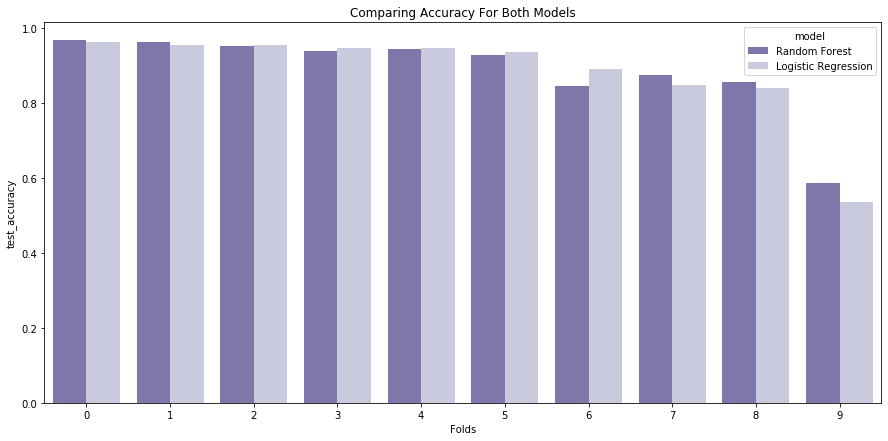

In [236]:
plt.figure(figsize = (15,7))
plt.title('Comparing Accuracy For Both Models')
plt.xlabel('Folds')
sns.barplot(f_results.index, f_results.test_accuracy, hue = f_results.model, palette = 'Purples_r')
plt.show()

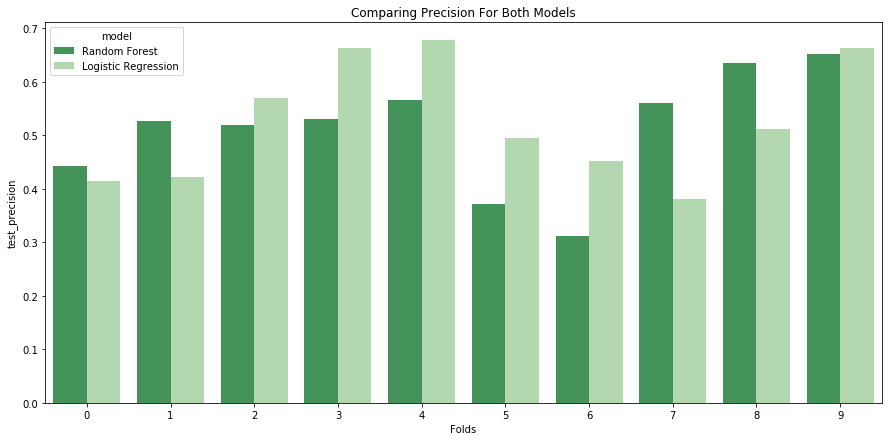

In [203]:
plt.figure(figsize = (15,7))
plt.title('Comparing Precision For Both Models')
plt.xlabel('Folds')
sns.barplot(f_results.index, f_results.test_precision, hue = f_results.model, palette = 'Greens_r')
plt.show()

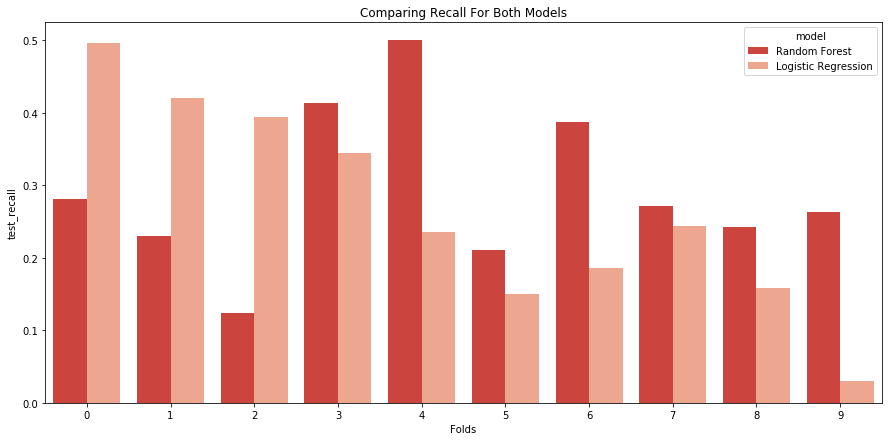

In [237]:
plt.figure(figsize = (15,7))
plt.title('Comparing Recall For Both Models')
plt.xlabel('Folds')
sns.barplot(f_results.index, f_results.test_recall, hue = f_results.model, palette = 'Reds_r')
plt.show()

- According to the above plots we can see that the Random Forest model is performing slightly better in all the metrics (accuracy, precision, recall). 
- So we will be using Random Forest Model for our predictions.